# Deutsch’s - Jozsa Algorithm

 <h3>What is Deutsch’s - Jozsa Algorithm?</h3>

Deutsch’s Algorithm is a quantum algorithm, which can determine if a function is constant or balanced using only one query. This contrasts with classical algorithms, which require multiple queries.

A constant function is one that always outputs the same value.
A balanced function is one that outputs 0 half of the time and 1 half of the time.

<h2>Problem Statement</h2>

Given a black box function f: {0, 1} → {0, 1}, determine whether f is a constant function or a balanced function. An oracle acts as a black box function.

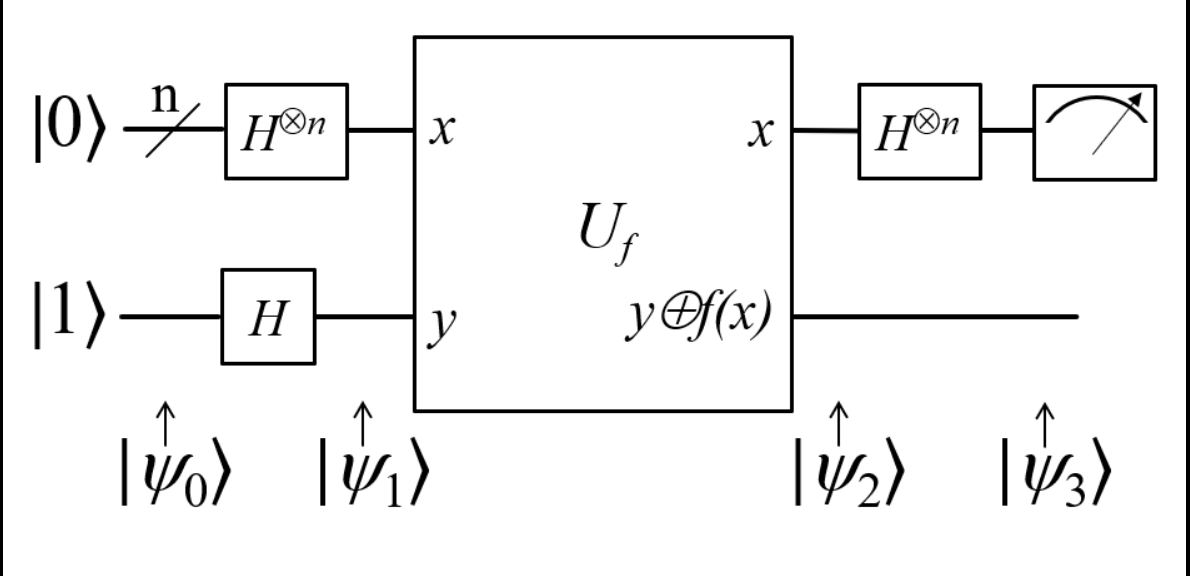

<h2>Steps</h2>

1. Initialize state.
2. Create superposition using Handamard gates.
3. Calculate function f using Uf.
4. Perform Handamard transform.
5. Measure to obtain final output.

# Implementation of Deutsch's - Jozsa Algorithm

<h3>Set up the Environment</h3>

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute,BasicAer
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.extensions import Initialize
from qiskit.circuit import Gate

<h3>Build the Quantum Circuit</h3>

In [2]:
# Define constant function
def constant_function():
    qc = QuantumCircuit(3) # Since the function is constant, no operation is performed on the qubit.
    return qc

In [3]:
# Define define balanced function
def balanced_function():
    qc = QuantumCircuit(3) # CNOT gate flips the second qubit if the first qubit is |1>
    #qc.cx(0, 1)
    qc.h(0)
    qc.cx(1, 0)
    qc.z(2)
    qc.h(0)
    
    #qc.cx(0, 1)
    return qc

<h4>Step 1: Initialize the three qubits to the state $|0\rangle|1\rangle$.</h4>

In [4]:
qc = QuantumCircuit(3,2)
# The first and second qubit should be in state |0> (which it already is by default).
# The thrird qubit should be in state |1>, which is achieved by applying an X gate.
qc.x(2)
print("Set the first and second qubit to |0> and the third qubit to |1>")
qc.draw('mpl', style='iqp')  
qc.barrier()


Set the first and second qubit to |0> and the third qubit to |1>


<h4>Step 2: Apply a Hadamard gate to each qubit.</h4>

In [5]:
# Apply a Hadamard gate to both qubits
qc.h(0)
qc.h(1)
qc.h(2)
print("Apply a Hadamard gate to both qubits")
qc.draw('mpl', style='iqp')  
qc.barrier()

Apply a Hadamard gate to both qubits


<h4>Step 3: Calculate function f using Uf.</h4>

In [6]:
# Apply the function
qc.append(constant_function(), [0, 1, 2])

print("Apply the UF function")
qc.draw('mpl', style='iqp')  
qc.barrier()

Apply the UF function


<h4>Step 4: Perform Handamard transform.</h4>

In [7]:
# Apply another Hadamard gate to the input qubit
qc.h(0)
qc.h(1)
print("Apply another Hadamard gate to the input qubit")
qc.draw('mpl', style='iqp') 
qc.barrier()

Apply another Hadamard gate to the input qubit


<h4>Step 5: Measure to obtain final output.</h4>

In [8]:
# Measurement
qc.measure(0, 0)
qc.measure(1, 1)
qc.draw('mpl', style='iqp')
qc.barrier()

# The quantum circuit for the Deutsch algorithm

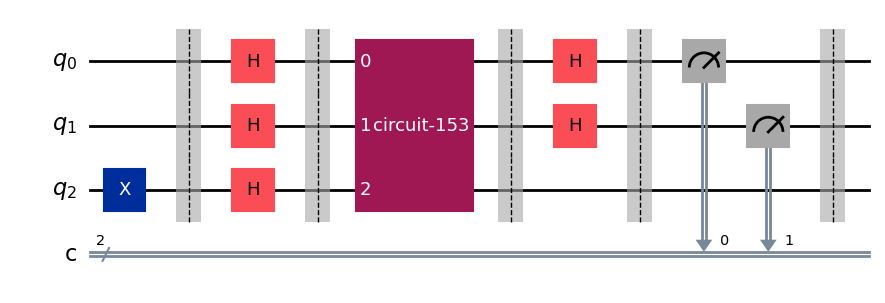

In [9]:
qc.draw('mpl', style='iqp')

In [10]:
# Simulate the circuit
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend)
result = job.result()

# Get the counts of measurement outcomes
counts = result.get_counts(qc)
for qc2qc1qc0 in counts:
    print(f"{qc2qc1qc0} is observed in {counts[qc2qc1qc0]} times")
    # If we measure |0>^n, then f is constant, other results tell us that f is balanced

00 is observed in 1024 times


<h4>What Does the Output Mean?</h4>

If 𝑓 is constant, the result will be ∣0⟩ for all qubits in the query register.
If 𝑓 is balanced, the result will be a non-zero state on at least one qubit in the query register.

<h4>Conclusion</h4>

Some positive aspects of the Deutsch-Jozsa algorithm include its ability to provide an exponential speedup over classical algorithms for the specific problem it addresses. While a classical algorithm might require up to \( 2^{n-1} + 1 \) queries to the function to determine if it is constant or balanced, the Deutsch-Jozsa algorithm requires only one quantum query. However, the Deutsch-Jozsa algorithm solves a very specific problem, leading to its limited practical application.

 <h2>References</h2>
 https://medium.com/@charlie.thomas_94667/deutsch-jozsa-algorithm-730cb159493d